In [1]:
import sqlite3
import pandas as pd
import pandasql as ps
import numpy as np

#visualization libraaries
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', 500)
pd.set_option('display.precision', 10)

In [2]:
#define data paths
path1=r'Data\CovidDeaths.xlsx'
path2=r'Data\CovidVaccinations.xlsx'

#create the database
db = sqlite3.connect('Data\COVID.db')

#add tables to the DB
dfs = [pd.read_excel(path1, sheet_name=None), pd.read_excel(path2, sheet_name=None)]
dfs[0]['CovidDeaths'].to_sql('Deaths', db)
dfs[1]['CovidVaccinations'].to_sql('Vaccinations', db)

85171

In [3]:
conn = sqlite3.connect('Data\COVID.db')
c = conn.cursor()

In [4]:
# lets define these functions to be able to write sql query easily !!

def sq(q):
    with conn:
        return pd.read_sql_query(q, conn)

# the same function but rename the columns to be more readable
def sq1(q):
    with conn:
        return pd.read_sql_query(q, conn).rename(columns=lambda x : x.title().replace('_',' '))

In [5]:
tables = sq('''
SELECT 
  Name,
  type
FROM 
  sqlite_master 
WHERE 
  type='table' 
''')

tables

,name,type
0,Deaths,table
1,Vaccinations,table


# DEATHS TABLE

In [6]:
sq('''
-- Select only the columns we are going to deal with
SELECT Location, date, total_cases, new_cases, total_deaths, population
FROM Deaths
where continent is not null --to exclude the data representing the whole continent
order by 1, 2 --Order by date and total cases
''')

,location,date,total_cases,new_cases,total_deaths,population
0,Afghanistan,2020-02-24 00:00:00,1.0,1.0,NaN,38928341.0
1,Afghanistan,2020-02-25 00:00:00,1.0,0.0,NaN,38928341.0
2,Afghanistan,2020-02-26 00:00:00,1.0,0.0,NaN,38928341.0
3,Afghanistan,2020-02-27 00:00:00,1.0,0.0,NaN,38928341.0
4,Afghanistan,2020-02-28 00:00:00,1.0,0.0,NaN,38928341.0
...,...,...,...,...,...,...
81055,Zimbabwe,2021-04-26 00:00:00,38102.0,16.0,1560.0,14862927.0
81056,Zimbabwe,2021-04-27 00:00:00,38164.0,62.0,1565.0,14862927.0
81057,Zimbabwe,2021-04-28 00:00:00,38191.0,27.0,1565.0,14862927.0
81058,Zimbabwe,2021-04-29 00:00:00,38235.0,44.0,1567.0,14862927.0


### Total Deaths vs Total Cases

In [7]:
sq('''
-- Total Deaths vs Total Cases
-- Death percentage of total cases
SELECT Location, date, total_cases, total_deaths, (total_deaths/total_cases)*100 as "deaths_percentage"
FROM Deaths
Where deaths_percentage is not NULL and continent is not null
--and Location like 'United Arab Emirates'
order by 1, 2
''')

,location,date,total_cases,total_deaths,deaths_percentage
0,Afghanistan,2020-03-22 00:00:00,34.0,1.0,2.9411764706
1,Afghanistan,2020-03-23 00:00:00,41.0,1.0,2.4390243902
2,Afghanistan,2020-03-24 00:00:00,43.0,1.0,2.3255813953
3,Afghanistan,2020-03-25 00:00:00,76.0,2.0,2.6315789474
4,Afghanistan,2020-03-26 00:00:00,80.0,3.0,3.7500000000
...,...,...,...,...,...
69463,Zimbabwe,2021-04-26 00:00:00,38102.0,1560.0,4.0942732665
69464,Zimbabwe,2021-04-27 00:00:00,38164.0,1565.0,4.1007231946
69465,Zimbabwe,2021-04-28 00:00:00,38191.0,1565.0,4.0978240947
69466,Zimbabwe,2021-04-29 00:00:00,38235.0,1567.0,4.0983392180


### Total Cases and Total Deaths vs Population

In [8]:
sq('''
-- Total Cases and Total Deaths vs Population
-- Cases percentage of Country Population
-- Deaths percentage of Country Population
SELECT Location, date, population, total_cases, total_deaths, (total_cases/population)*100 as "cases_percentage", (total_deaths/population)*100 as "deaths_percentage"
FROM Deaths
WHERE cases_percentage is not NULL and continent is not null
--and Location like 'United Arab Emirates'
ORDER BY 1, 2
''')

,location,date,population,total_cases,total_deaths,cases_percentage,deaths_percentage
0,Afghanistan,2020-02-24 00:00:00,38928341.0,1.0,NaN,0.0000025688,NaN
1,Afghanistan,2020-02-25 00:00:00,38928341.0,1.0,NaN,0.0000025688,NaN
2,Afghanistan,2020-02-26 00:00:00,38928341.0,1.0,NaN,0.0000025688,NaN
3,Afghanistan,2020-02-27 00:00:00,38928341.0,1.0,NaN,0.0000025688,NaN
4,Afghanistan,2020-02-28 00:00:00,38928341.0,1.0,NaN,0.0000025688,NaN
...,...,...,...,...,...,...,...
78961,Zimbabwe,2021-04-26 00:00:00,14862927.0,38102.0,1560.0,0.2563559654,0.0104959138
78962,Zimbabwe,2021-04-27 00:00:00,14862927.0,38164.0,1565.0,0.2567731107,0.0105295545
78963,Zimbabwe,2021-04-28 00:00:00,14862927.0,38191.0,1565.0,0.2569547708,0.0105295545
78964,Zimbabwe,2021-04-29 00:00:00,14862927.0,38235.0,1567.0,0.2572508093,0.0105430108


### Total infections and total deaths

In [9]:
q='''
-- Total countries infection and deaths
select Location, MAX(CAST(total_cases as int)) total_cases_count,  MAX(CAST(total_deaths as int)) as total_deaths_count
from Deaths
where continent is not null
group by 1
order by 2 desc
'''
sq(q)

,location,total_cases_count,total_deaths_count
0,United States,32346971.0,576232.0
1,India,19164969.0,211853.0
2,Brazil,14659011.0,403781.0
3,France,5677835.0,104675.0
4,Turkey,4820591.0,40131.0
...,...,...,...
205,Curacao,NaN,NaN
206,Cayman Islands,NaN,NaN
207,Bermuda,NaN,NaN
208,Aruba,NaN,NaN


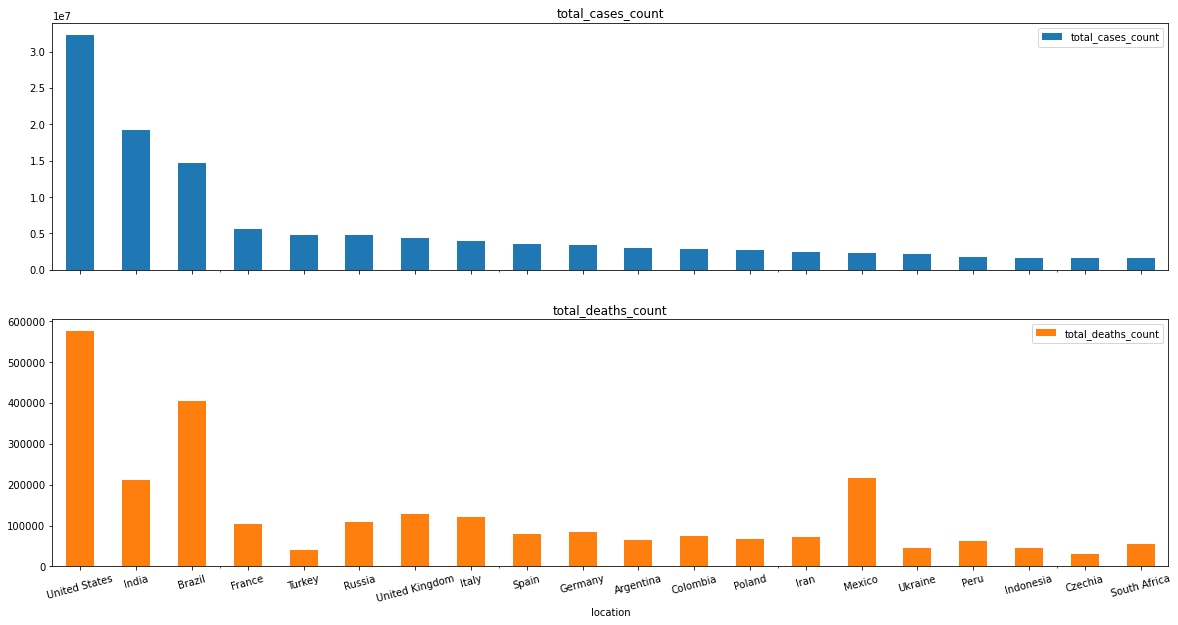

In [10]:
(
    sq(q).
    set_index('location').
    nlargest(20, 'total_cases_count').
    plot(
        kind='bar', 
        figsize=(20, 10), 
        subplots=True,
        rot='15'
    )
);

### Infection rate

In [11]:
q='''
-- Countries infection rate vs Population
select Location, population, MAX(total_cases) as max_infection,  MAX(total_cases/population)*100 as infection_rate
from Deaths
where continent is not null
group by 1, 2
order by infection_rate desc
'''
sq(q)

,location,population,max_infection,infection_rate
0,Andorra,77265.0,13232.0,17.1254772536
1,Montenegro,628062.0,97389.0,15.5062716738
2,Czechia,10708982.0,1630758.0,15.2279460363
3,San Marino,33938.0,5066.0,14.9272202251
4,Slovenia,2078932.0,240292.0,11.5584348117
...,...,...,...,...
205,Nauru,10834.0,NaN,NaN
206,Northern Cyprus,NaN,NaN,NaN
207,Saint Helena,6071.0,NaN,NaN
208,Tonga,105697.0,NaN,NaN


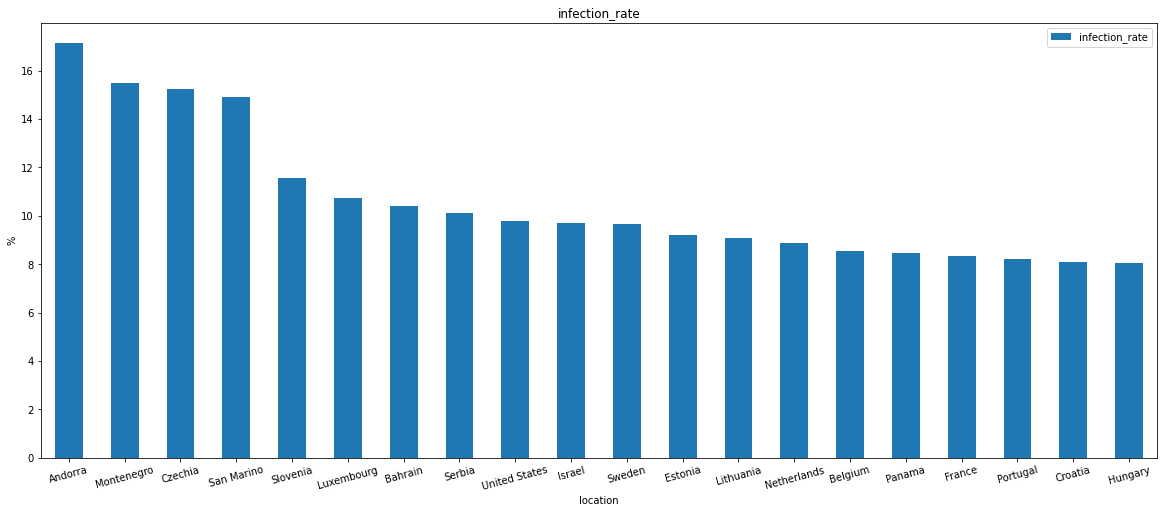

In [12]:
(
    sq(q)[['location','infection_rate']].
    set_index('location').
    nlargest(20, 'infection_rate').
    plot(
        kind='bar', 
        figsize=(20, 8), 
        subplots=True,
        rot='15',
        ylabel='%'
    )
);

### Death rate

In [13]:
q='''
-- Countries death rate vs Population
select Location, population, MAX(CAST(total_deaths as int)) as max_deaths,  MAX(total_deaths/population)*100 as death_rate
from Deaths
where continent is not null
group by 1, 2
order by Death_rate desc
'''
sq(q)

,location,population,max_deaths,death_rate
0,Hungary,9660350.0,27540.0,0.2850828386
1,Czechia,10708982.0,29267.0,0.2732939508
2,San Marino,33938.0,90.0,0.2651894631
3,Bosnia and Herzegovina,3280815.0,8551.0,0.2606364577
4,Montenegro,628062.0,1495.0,0.2380338247
...,...,...,...,...
205,Samoa,198410.0,NaN,NaN
206,Solomon Islands,686878.0,NaN,NaN
207,Tonga,105697.0,NaN,NaN
208,Turks and Caicos Islands,38718.0,NaN,NaN


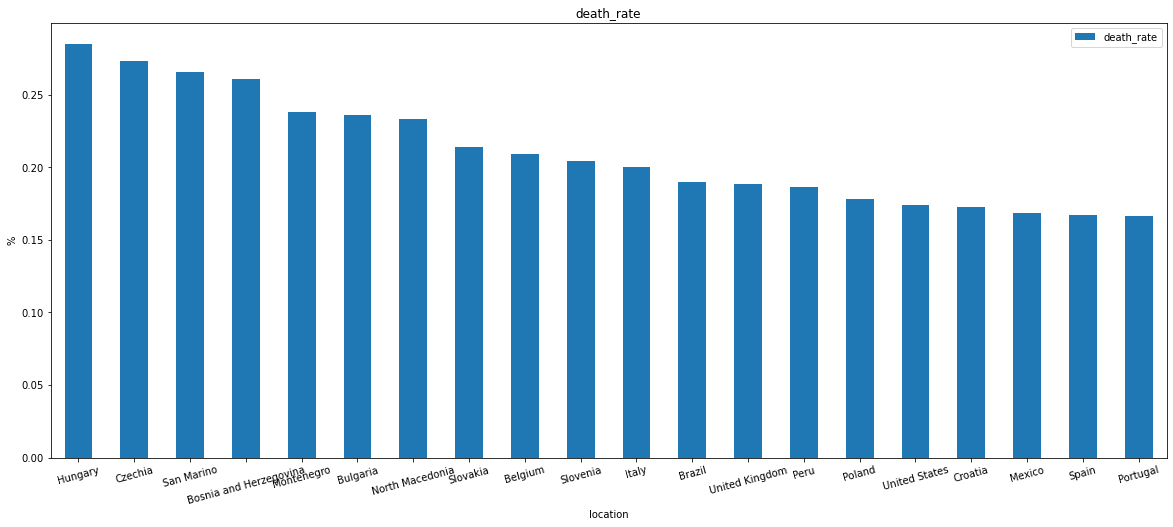

In [14]:
(
    sq(q)[['location','death_rate']].
    set_index('location').
    nlargest(20, 'death_rate').
    plot(
        kind='bar', 
        figsize=(20, 8), 
        subplots=True,
        rot='15',
        ylabel='%'
    )
);

### Continent Level Aggregation

In [15]:
sq('''
SELECT location,
    MAX(CAST(total_cases as int)) total_cases_count,  MAX(CAST(total_deaths as int)) as total_deaths_count,
    MAX(CAST(total_cases as int)) total_cases_count,  MAX(CAST(total_deaths as int)) as total_deaths_count
FROM Deaths
WHERE continent IS NULL
GROUP BY location
ORDER BY total_cases_count DESC
''')

,location,total_cases_count,total_deaths_count,total_cases_count,total_deaths_count
0,World,151399480,3180238,151399480,3180238
1,Europe,44863478,1016750,44863478,1016750
2,Asia,39526308,520286,39526308,520286
3,North America,37529488,847942,37529488,847942
4,European Union,30771214,688896,30771214,688896
5,South America,24878216,672415,24878216,672415
6,Africa,4557699,121784,4557699,121784
7,Oceania,43570,1046,43570,1046
8,International,721,15,721,15


### Worldwide daily report

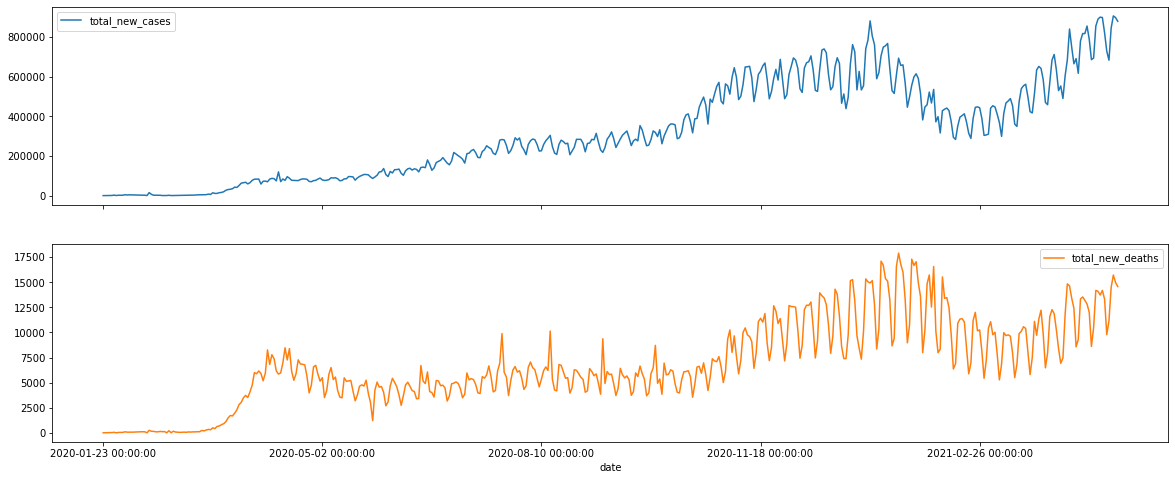

In [16]:
sq('''
SELECT *
FROM(
    SELECT date,
        Sum(CAST(new_cases AS INT)) total_new_cases,
        Sum(CAST(new_deaths AS INT)) AS total_new_deaths
    FROM Deaths
    WHERE continent IS NOT NULL
    GROUP BY date
    )
WHERE (total_new_cases IS NOT NULL OR total_new_deaths IS NOT NULL)
ORDER BY 1, 2
''').set_index('date').plot(figsize=(20, 8), subplots=True);

In [17]:
sq('''
select SUM(CAST(new_cases as int)) total_cases,  SUM(CAST(new_deaths as int)) as total_deaths
from Deaths
where continent is not null
''')

,total_cases,total_deaths
0,150574977,3180206


# Vaccinations

### New daily vacc and rolling total vacc 

In [18]:
sq('''
select *
from (
    select d.continent, d.location, d.date, d.population, v.new_vaccinations,
    -- Apply window function over the location to calculate the cumulative vaccinations instead of the original column
        SUM(CAST(v.new_vaccinations as int)) over (partition by d.location order by d.location and d.date) as total_vaccinations
    from Deaths as d
    join Vaccinations as v
    on d.location=v.location
    and d.date=v.date
    where d.continent is not null
    order by 1, 2, 3
    )
where new_vaccinations is not null
and total_vaccinations is not null
''')

,continent,location,date,population,new_vaccinations,total_vaccinations
0,Africa,Algeria,2021-01-30 00:00:00,43851043.0,30.0,30
1,Africa,Cameroon,2021-04-12 00:00:00,26545864.0,400.0,400
2,Africa,Cote d'Ivoire,2021-03-09 00:00:00,26378275.0,1439.0,110682
3,Africa,Cote d'Ivoire,2021-03-10 00:00:00,26378275.0,4439.0,110682
4,Africa,Cote d'Ivoire,2021-03-15 00:00:00,26378275.0,244.0,110682
...,...,...,...,...,...,...
6993,South America,Uruguay,2021-04-26 00:00:00,3473727.0,46478.0,1833763
6994,South America,Uruguay,2021-04-27 00:00:00,3473727.0,46488.0,1833763
6995,South America,Uruguay,2021-04-28 00:00:00,3473727.0,45039.0,1833763
6996,South America,Uruguay,2021-04-29 00:00:00,3473727.0,46307.0,1833763


### Total Vaccinations for countries

In [19]:
sq('''
select *, (total_vaccinations/population)*100 as vaccinated_people_percentage
from (
    select d.continent, d.location, d.date, d.population, v.new_vaccinations, v.total_vaccinations,
    -- Apply window function over the location to calculate the cumulative vaccinations instead of the original column
        SUM(CAST(v.new_vaccinations as int)) over (partition by d.location order by d.location, d.date) as rolling_vaccinations
    from Deaths as d
    join Vaccinations as v
        on d.location=v.location
        and d.date=v.date
    where d.continent is not null
    --order by 1, 2, 3
    )
''').iloc[852:]

,continent,location,date,population,new_vaccinations,total_vaccinations,rolling_vaccinations,vaccinated_people_percentage
852,Europe,Albania,2021-04-20 00:00:00,2877800.0,4066.0,350000.0,229354.0,12.1620682466
853,Europe,Albania,2021-04-21 00:00:00,2877800.0,22075.0,372075.0,251429.0,12.9291472653
854,Europe,Albania,2021-04-22 00:00:00,2877800.0,10923.0,382998.0,262352.0,13.3087080409
855,Europe,Albania,2021-04-23 00:00:00,2877800.0,8353.0,391351.0,270705.0,13.5989644868
856,Europe,Albania,2021-04-24 00:00:00,2877800.0,8713.0,400064.0,279418.0,13.9017304886
...,...,...,...,...,...,...,...,...
81055,Africa,Zimbabwe,2021-04-26 00:00:00,14862927.0,21592.0,411610.0,410296.0,2.7693737579
81056,Africa,Zimbabwe,2021-04-27 00:00:00,14862927.0,22329.0,433939.0,432625.0,2.9196066158
81057,Africa,Zimbabwe,2021-04-28 00:00:00,14862927.0,24074.0,458013.0,456699.0,3.0815800952
81058,Africa,Zimbabwe,2021-04-29 00:00:00,14862927.0,19584.0,477597.0,476283.0,3.2133441818


### Create Percent Population Vaccinated

In [20]:
c.execute('''
Drop table if exists PercentPopulationVaccinated
''')

In [21]:
c.execute('''
create table PercentPopulationVaccinated
(
Continent nvarchar(225),
Location nvarchar(225),
Date datetime,
Population numeric,
New_Vaccinations numeric,
RollingTotalVaccinated numeric)
''')

In [22]:
tables = sq('''
SELECT 
  Name,
  type
FROM 
  sqlite_master 
WHERE 
  type='table' 
''')

tables

,name,type
0,Deaths,table
1,Vaccinations,table
2,PercentPopulationVaccinated,table


In [23]:
c.execute('''
Insert into PercentPopulationVaccinated
select d.continent, d.location, d.date, d.population, v.new_vaccinations,
    SUM(CAST(v.new_vaccinations as int)) over (partition by d.location order by d.location, d.date) as rolling_vaccinations
from Deaths as d
join Vaccinations as v
    on d.location=v.location
    and d.date=v.date
where d.continent is not null
''')

In [24]:
sq('''
select * 
from PercentpopulationVaccinated
''')

,Continent,Location,Date,Population,New_Vaccinations,RollingTotalVaccinated
0,Asia,Afghanistan,2020-02-24 00:00:00,38928341.0,NaN,NaN
1,Asia,Afghanistan,2020-02-25 00:00:00,38928341.0,NaN,NaN
2,Asia,Afghanistan,2020-02-26 00:00:00,38928341.0,NaN,NaN
3,Asia,Afghanistan,2020-02-27 00:00:00,38928341.0,NaN,NaN
4,Asia,Afghanistan,2020-02-28 00:00:00,38928341.0,NaN,NaN
...,...,...,...,...,...,...
81055,Africa,Zimbabwe,2021-04-26 00:00:00,14862927.0,21592.0,410296.0
81056,Africa,Zimbabwe,2021-04-27 00:00:00,14862927.0,22329.0,432625.0
81057,Africa,Zimbabwe,2021-04-28 00:00:00,14862927.0,24074.0,456699.0
81058,Africa,Zimbabwe,2021-04-29 00:00:00,14862927.0,19584.0,476283.0
